<a href="https://colab.research.google.com/github/javeed999/DSA/blob/main/firstLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

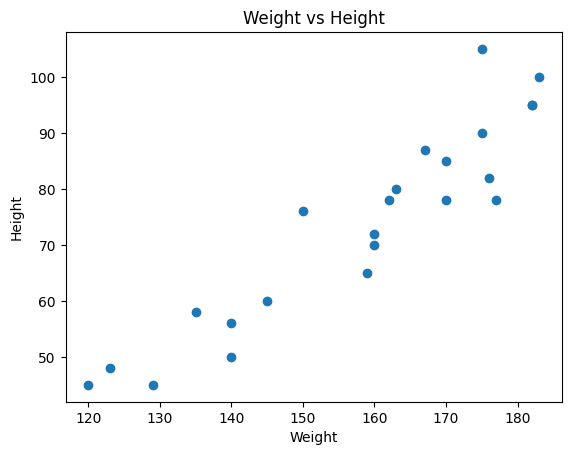

In [7]:
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.scatter(df["Height"],df["Weight"])

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


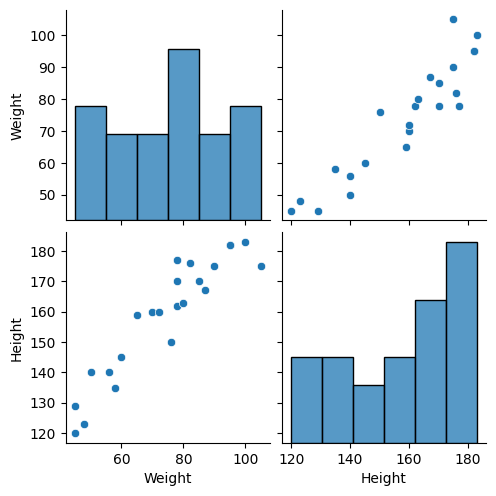

In [9]:
sns.pairplot(df)

In [10]:
X=df[["Weight"]]
np.array(X).shape

(23, 1)

In [11]:
x_series=df["Weight"]
np.array(x_series).shape

(23,)

In [12]:
Y=df["Height"]
np.array(Y).shape

(23,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
x_train.shape

(17, 1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [19]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


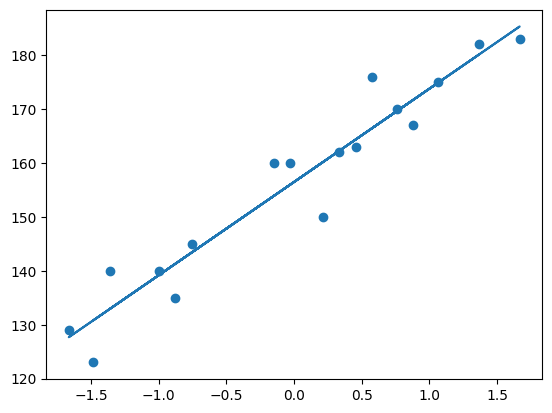

In [24]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [25]:
y_pred=regression.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,root_mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(mse)
print(mae)
print(rmse,np.sqrt(mse))

114.84069295228699
9.66512588679501
10.716374991212605 10.716374991212605


In [28]:
from sklearn.metrics import r2_score
score_r2=r2_score(y_test,y_pred)
score_r2


0.7360826717981276

In [37]:
1- ( (1-score_r2)*(len(y_test-1) ) / (len(y_test)-x_test.shape[1]-1))


0.6041240076971914

In [34]:
import statsmodels.api as sm

In [36]:
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 04 Sep 2025   Prob (F-statistic):                       0.664
Time:                        12:41:27   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
print(regression.predict(scaler.transform([[72]])))

[155.97744705]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
